<a href="https://colab.research.google.com/github/shabana1408/Project-2/blob/main/Project_2_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

- Student: Shabana Patel

## Requirements

Propose two possible datasets you would like to work with and indicate which is your first and which is your second choice.

Upload and shown the .head() of each of your data sets. For each of the proposed datasets, include the following information in text cells:

1. Source of data

2. Brief description of data

3. What is the target?

4. What does one row represent? (A person? A business? An event? A product?)

5. Is this a classification or regression problem?

6. How many features does the data have?

7. How many rows are in the dataset?

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

## Imports

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import set_config

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, ColumnTransformer

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay

set_config(display='diagram')

plt.style.use(['dark_background','seaborn-v0_8-pastel'])

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pd.set_option('display.max_columns', None)

## First choice: Heart Failure Prediction Dataset

Load the data

In [4]:
fpath1 = '/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week08/Data/heart.csv'

df1 = pd.read_csv(fpath1)

Inspect the data

In [5]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df1.shape
print(f'There are {df1.shape[0]} rows and {df1.shape[1]} columns.')
print(f'The rows represent {df1.shape[0]} observations, and the columns represent {df1.shape[1]-1} features and 1 target variable.')

There are 918 rows and 12 columns.
The rows represent 918 observations, and the columns represent 11 features and 1 target variable.


1. Source of the data

> https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

2. Brief description of data

> This dataset contains 918 rows and 12 columns. It was created by combining five heart datasets over 11 common features.

3. What is the target?

> `HeartDisease` with values
> - 1 (Heart Disease)
> - 0 (Normal)

4. What does one row represent?

> Each row represents one person or patient.



5. Is this a classification or regression problem?

> Classification

6. How many features does the data have?

> The dataset has 11 features.

7. How many rows are in the dataset?

> There are 918 rows in the dataset.


8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

> I don't foresee any challenges at this time.

## Second choice: Fetal Health Classification

Load the data

In [7]:
fpath2 = '/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week08/Data/fetal_health.csv'

df2 = pd.read_csv(fpath2)

Inspect the data

In [8]:
df2.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [9]:
df2.shape
print(f'There are {df2.shape[0]} rows and {df2.shape[1]} columns.')
print(f'The rows represent {df2.shape[0]} observations, and the columns represent {df2.shape[1]-1} features and 1 target variable.')

There are 2126 rows and 22 columns.
The rows represent 2126 observations, and the columns represent 21 features and 1 target variable.


1. Source of the data

> https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

2. Brief description of data

> This dataset contains 2126 rows and 22 columns. Data is extracted from cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:
> - Normal
> - Suspect
> - Pathological

3. What is the target?

> `fetal_health` with values
> - 1 (Normal)
> - 2 (Suspect) and
> - 3 (Pathological)

4. What does one row represent?

> Each row represents the results from one cardiotocogram exam.

5. Is this a classification or regression problem?

> Classification

6. How many features does the data have?

> The dataset has 21 features.

7. How many rows are in the dataset?

> There are 2 126 rows in the dataset.


8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

> I don't foresee any challenges at this time.

# Part 2



## Requirements

Clean and explore the data set.

- Deleted unnecessary columns.
- Deleted duplicate rows.
- Identify and address missing values.
- Identify and correct inconsistencies in data for categorical values.
- Produce univariate visuals for the target and all features.
- Identify outliers.

*Clearly comment all cleaning steps and describe any decisions made.*

## Data dictionary

> **Age**
> - Age of the patient (years)
>
> **Sex**
> - Gender of the patient (M: Male, F: Female)
>
> **ChestPainType**
> - Type of chest pain (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
>
> **RestingBP**
> - Resting blood pressure (mm/Hg)
>
> **Cholesterol**
> - Serum cholesterol (mm/dl)
>
> **FastingBS**
> - Fasting blood sugar (1: FastingBS > 120 mg/dl, 0: Otherwise)
>
> **RestingECG**
> - Resting electrocardiogram results (Normal: Normal, ST: Has ST-T wave abnormality (i.e. T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)
>
> **MaxHR**
> - Maximum heart rate achieved (value between 60 and 202)
>
> **ExerciseAngina**
> - Exercise-induced angina (Y: Yes, N: No)
>
> **Oldpeak**
> - Old peak is equal to ST (value)
>
> **ST_Slope**
> - The slope of the peak exercise ST segment (Up: Upwards slope, Flat: Flat, Down: Downwards slope)
>
> **HeartDisease**
> - Target (1: Heart Disease, 0: Normal)


## Snippets
**from code-along*

In [10]:
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (8,6), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()

  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100

  # Fill na with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)

  # Countplot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)

  # Rotate tick labels for long names
  #ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)

  # Define the most common value
  most_common_val = val_counts.index[0]
  freq = val_counts.values[0]

  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # Print quasi-constant or constant message (i.e. if the most common value is more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

def explore_numeric(df, x, figsize=(8,6) ):

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100

  # Create figure with desired figsize
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True)
  # Histogram on top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot at the bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  # Add a title with the feature name included
  axes[0].set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")

   # First find value counts of feature
  val_counts = df[x].value_counts(dropna=False)

  # Define the most common value
  most_common_val = val_counts.index[0]
  freq = val_counts.values[0]

  # Calculate the percentage of the most common value
  perc_most_common = freq / len(df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # Print quasi-constant or constant message (i.e. if the most common value is more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

In [11]:
def plot_categorical_vs_target(df, x, y, fillna = True, placeholder = 'MISSING',
                               figsize=(8,6), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()

  # Fill na with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)

  # Countplot
  sns.countplot(data=temp_df, x=x, hue=y, ax=ax, order=order)

  # Add a title with the feature name included
  ax.set_title(f"{x} vs. {y}")

  # Fix layout and show plot
  fig.tight_layout()
  plt.show()

def plot_numeric_vs_target(df, x, y,
                           figsize=(8,6)):

  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)

  # Pairplot
  #sns.pairplot(data=df, hue=y, vars=[x], diag_kind='kde')

  # Histogram
  sns.histplot(data=df, x=x, hue=y, ax=ax)

 # Add a title with the feature name and correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")

  # Fix layout and show plot
  fig.tight_layout()
  plt.show()

In [12]:
def evaluate_model(model_name, model_pipe, X_train, y_train, X_test, y_test):

  # Predictions
  y_pred_train = model_pipe.predict(X_train)
  y_pred_test = model_pipe.predict(X_test)

  # Classification report for train data
  print('---'*20)
  print(f'Training data classification report: {model_name}')
  print('---'*20)

  print(classification_report(y_train, y_pred_train))

  # Make figure for training confusion matrix
  fig, axes = plt.subplots(ncols=2, figsize=(10,5))

  ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, normalize='true',
                                          cmap='crest_r', ax=axes[0])
  axes[0].set_title('Confusion Matrix')

  # Make figure for training ROC Curve

  RocCurveDisplay.from_estimator(model_pipe, X_train, y_train, ax=axes[1])
  axes[1].plot([0, 1], [0, 1], color = 'blue', ls = '--', label = 'Baseline (AUC = 0.5)')
  axes[1].legend();
  axes[1].set_title('ROC Curve')

  fig.suptitle('Training data')
  fig.tight_layout()
  plt.show()

  # Classification report for test data
  print('---'*20)
  print(f'Testing data classification report: {model_name}')
  print('---'*20)

  print(classification_report(y_test, y_pred_test))

  # Make figure for testing confusion matrix
  fig, axes = plt.subplots(ncols=2, figsize=(10,5))

  ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, normalize='true',
                                          cmap='mako', ax=axes[0])
  axes[0].set_title('Confusion Matrix')

  # Make figure for testing ROC Curve

  RocCurveDisplay.from_estimator(model_pipe, X_test, y_test, ax=axes[1])
  axes[1].plot([0, 1], [0, 1], color = 'blue', ls = '--', label = 'Baseline (AUC = 0.5)')
  axes[1].legend();
  axes[1].set_title('ROC Curve')

  fig.suptitle('Testing data')
  fig.tight_layout()
  plt.show()

## Heart Failure Prediction Dataset

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


> - There seems to be `no` missing values.
> - There are `no` unwanted columns.

**Checking data types**

Change the `FastingBS` column to categorical

In [14]:
#df1['FastingBS'] = df1['FastingBS'].astype('category')

current = [0, 1]
replacement = ['Other', '>120 mg/dl']

rename_dict = dict(zip(current, replacement))
df1['FastingBS'] = df1['FastingBS'].replace(rename_dict)

**Checking for and removing duplicates**

In [15]:
print(f'There are {df1.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


> - There are `no` duplicates.

In [16]:
#df1.drop_duplicates(inplace=True)

**Checking for missing values**

In [17]:
print(f'There are {df1.isna().sum().sum()} missing values.')

There are 0 missing values.


In [18]:
#df1.isna().sum()

> - There are `no` missing values.

**Checking for inconsistencies in categorical columns**

In [19]:
obj_columns = df1.select_dtypes('object')
for i in obj_columns:
  print(i)
  print(df1[i].value_counts())
  print('\n')

Sex
M    725
F    193
Name: Sex, dtype: int64


ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64


FastingBS
Other         704
>120 mg/dl    214
Name: FastingBS, dtype: int64


RestingECG
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64


ExerciseAngina
N    547
Y    371
Name: ExerciseAngina, dtype: int64


ST_Slope
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64




> - There are `no` inconsistencies in categorical columns.

**Checking for impossible values in numerical data**

In [20]:
stats =  df1.describe(include='number').round(2)
stats.loc[['mean','min','max']]

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
mean,53.51,132.4,198.8,136.81,0.89,0.55
min,28.00,0.0,0.0,60.00,-2.60,0.00
max,77.00,200.0,603.0,202.00,6.20,1.00


> - There seems to be `no` extreme values.

Make a copy of the dataset:

In [21]:
df_ml = df1.copy()

## Exploratory data analysis

###Univariate visuals

**Target visualisation**

In [22]:
target = 'HeartDisease'

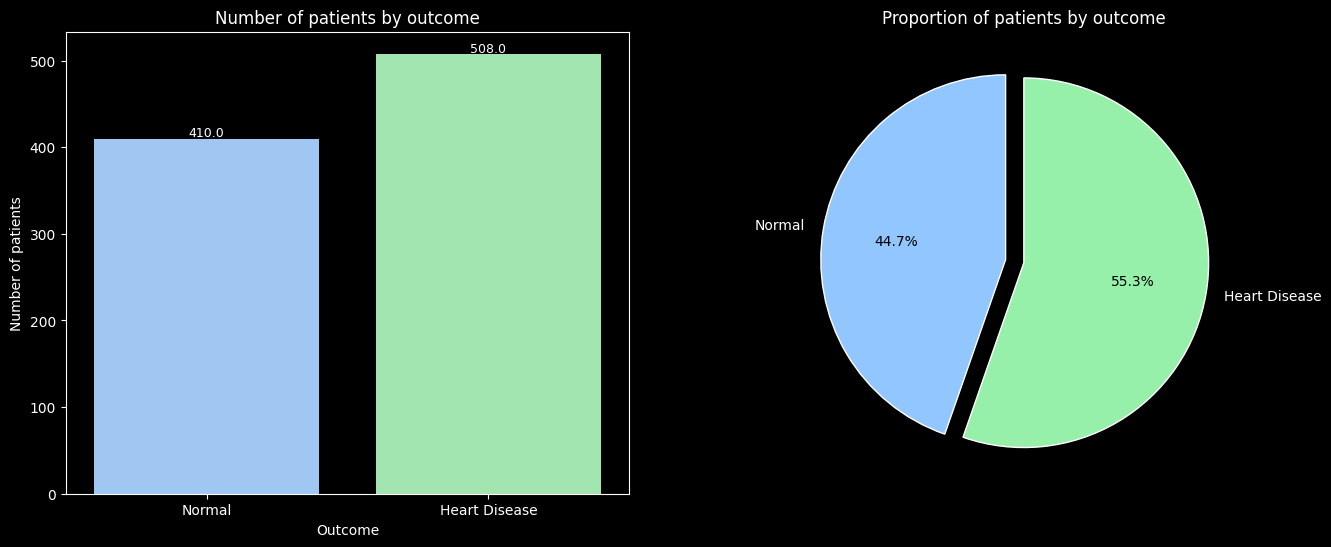

In [23]:
heartdisease = list(df1['HeartDisease'].value_counts())
heartdisease_pie = [heartdisease[1] / sum(heartdisease) * 100, heartdisease[0] / sum(heartdisease) * 100]


fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))

plt.subplot(1, 2, 1)
ax = sns.countplot(data = df1, x= 'HeartDisease')

for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, bar.get_height(), horizontalalignment='center', fontsize = 9, color='white')

ax.set_xticklabels(['Normal','Heart Disease'])
plt.xlabel('Outcome', fontdict={'fontsize':10})
plt.ylabel('Number of patients', fontdict={'fontsize':10})
plt.title('Number of patients by outcome');

plt.subplot(1, 2, 2)
_,_, autotexts = plt.pie(heartdisease_pie, labels = ['Normal','Heart Disease'], autopct='%1.1f%%',
        startangle = 90, explode = (0.1, 0),
        wedgeprops = {'edgecolor' : 'white', 'linewidth': 1, 'antialiased' : True})

for ins in autotexts:
    ins.set_color('black')

plt.title('Proportion of patients by outcome');

plt.show()

> - The data seems to be balanced.

**Categorical features visualisation**

Exclude the target

In [24]:
x = df1.drop(columns='HeartDisease')

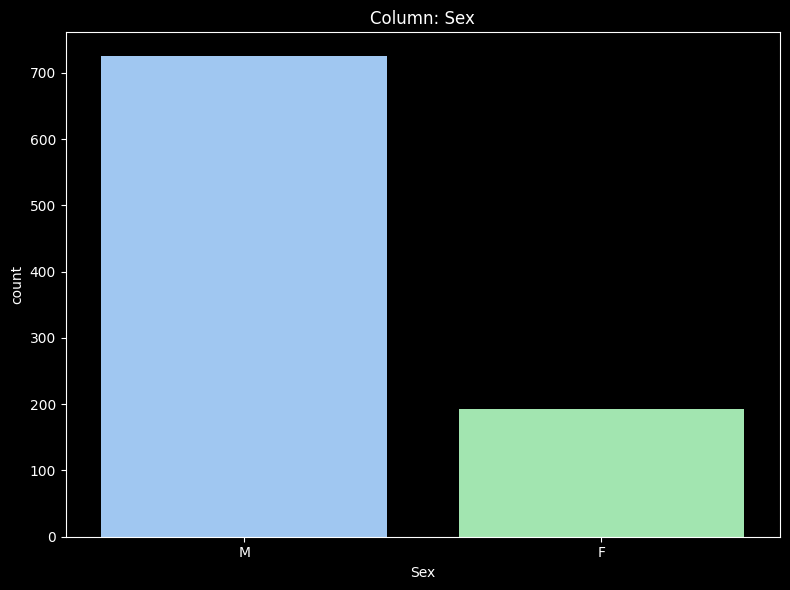

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'M' occurs 725 times (78.98%)
- Not constant or quasi-constant.


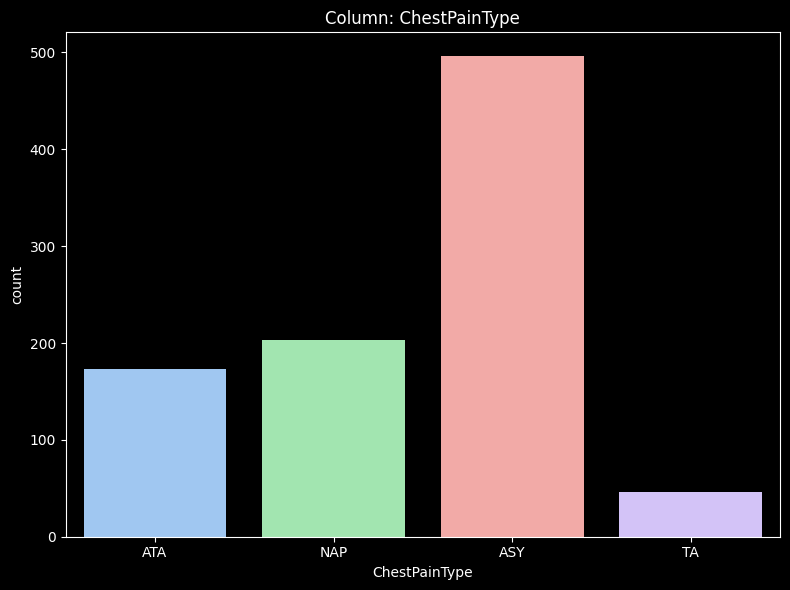

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'ASY' occurs 496 times (54.03%)
- Not constant or quasi-constant.


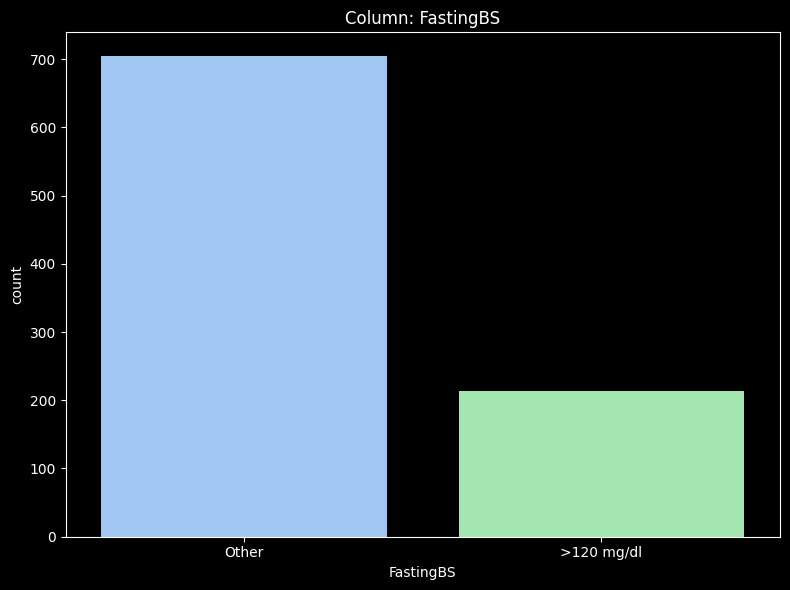

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Other' occurs 704 times (76.69%)
- Not constant or quasi-constant.


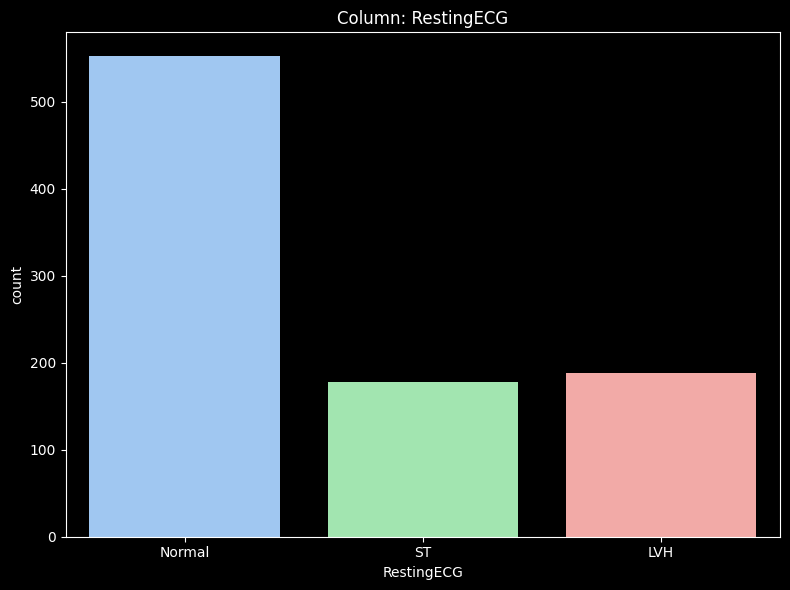

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Normal' occurs 552 times (60.13%)
- Not constant or quasi-constant.


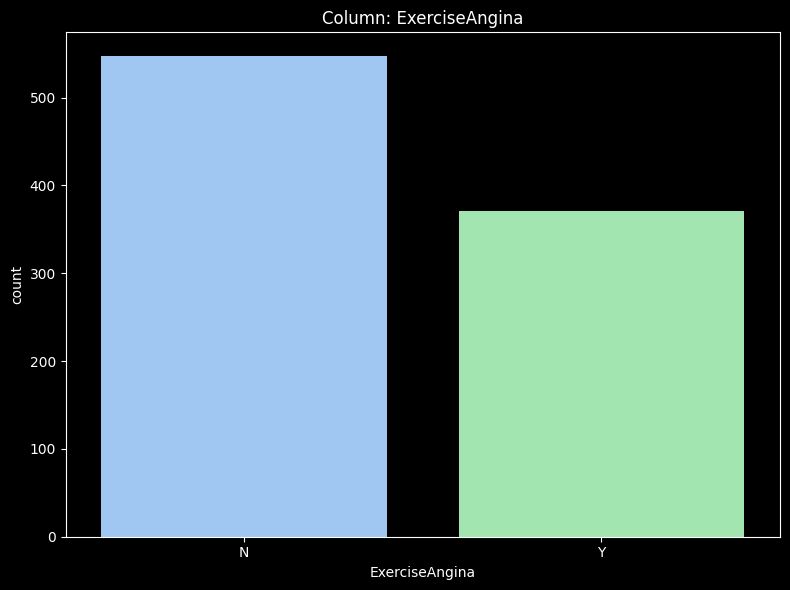

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'N' occurs 547 times (59.59%)
- Not constant or quasi-constant.


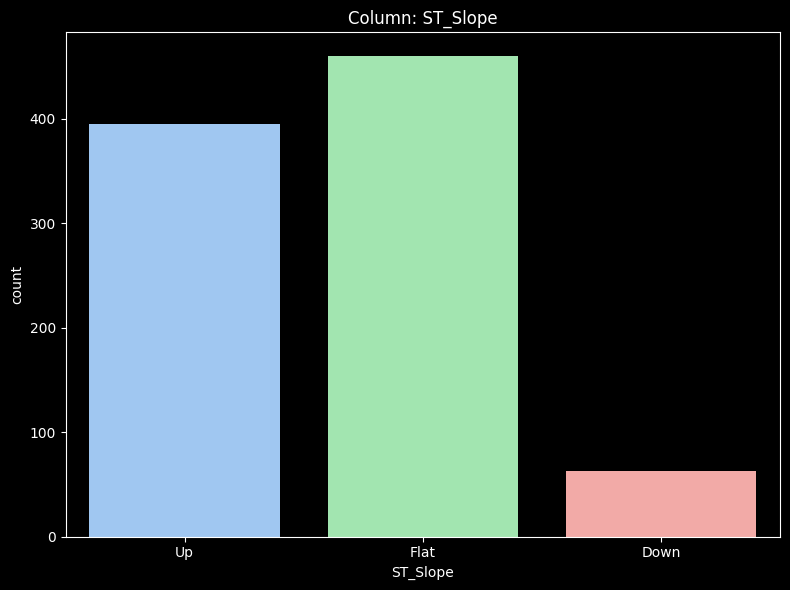

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Flat' occurs 460 times (50.11%)
- Not constant or quasi-constant.


In [25]:
cat_feature = x.select_dtypes('object').columns

for i in cat_feature:
  explore_categorical(df1, i);

> - There are more male (`79%`) than female patients.
> - More than half of the patients (`54%`) present with asymptomatic (`ASY`) chest pain.
> - `77%` of patients have a fasting blood sugar of less than or equal to 120 mg/dl (`Other`).
> - Majority of patients (`60%`) have a normal resting ECG.
> - Majority of patients (`60%`) do not have exercise-induced angina (`N`).
> - `60%` of patients have a flat ST slope.

**Numerical features visualisation**

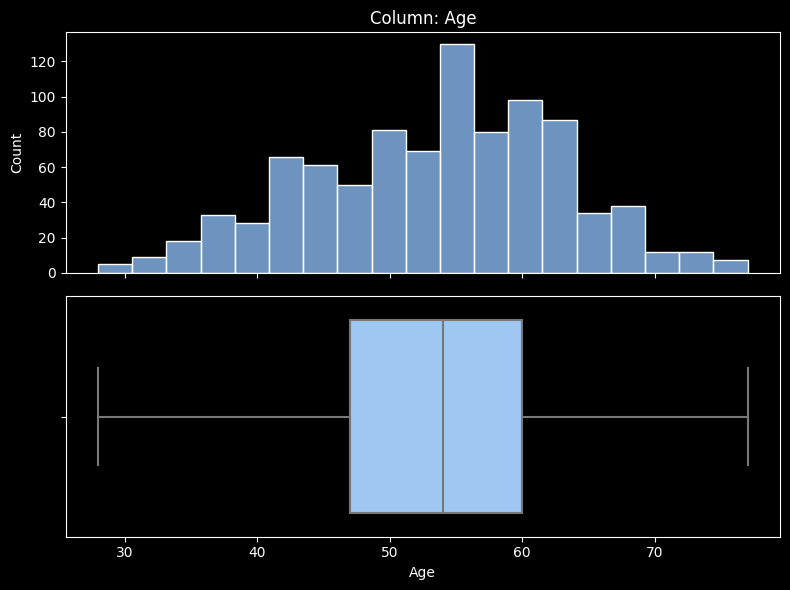

- NaN's Found: 0 (0.0%)
- Unique Values: 50
- Most common value: '54' occurs 51 times (5.56%)
- Not constant or quasi-constant.


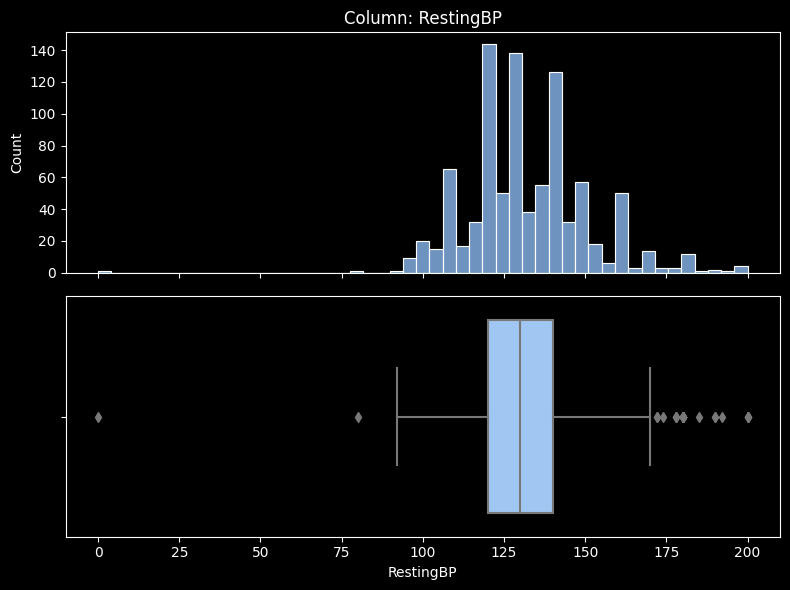

- NaN's Found: 0 (0.0%)
- Unique Values: 67
- Most common value: '120' occurs 132 times (14.38%)
- Not constant or quasi-constant.


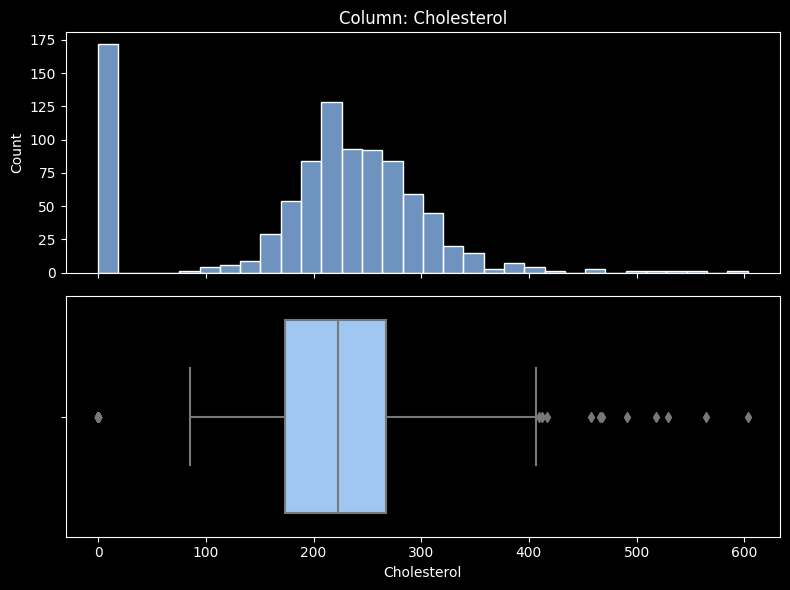

- NaN's Found: 0 (0.0%)
- Unique Values: 222
- Most common value: '0' occurs 172 times (18.74%)
- Not constant or quasi-constant.


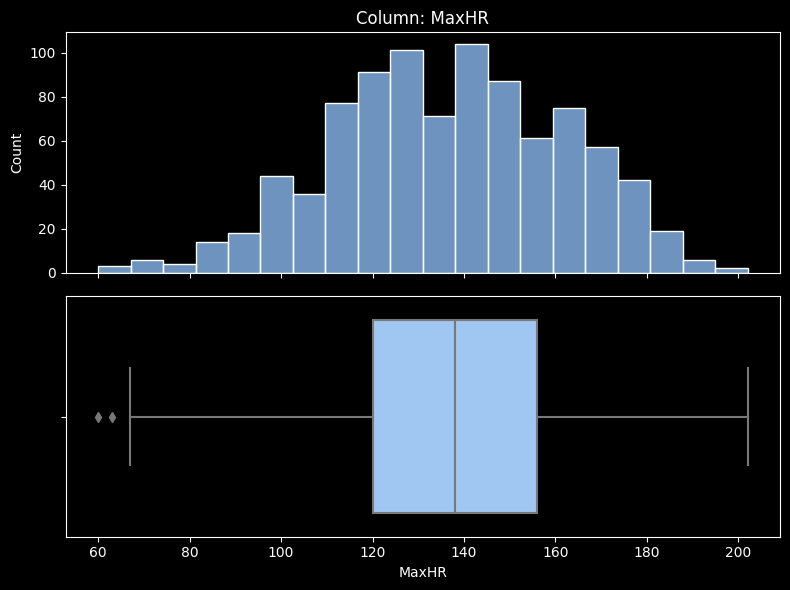

- NaN's Found: 0 (0.0%)
- Unique Values: 119
- Most common value: '150' occurs 43 times (4.68%)
- Not constant or quasi-constant.


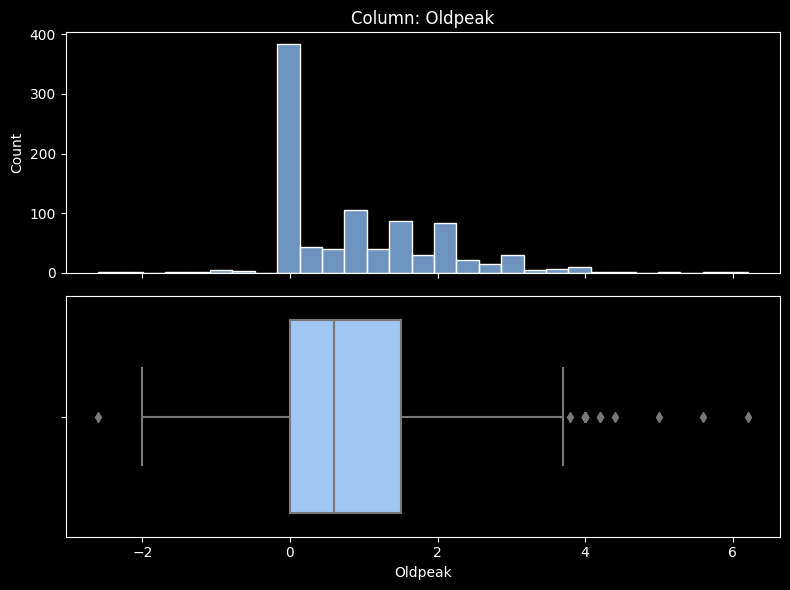

- NaN's Found: 0 (0.0%)
- Unique Values: 53
- Most common value: '0.0' occurs 368 times (40.09%)
- Not constant or quasi-constant.


In [26]:
num_feature = x.select_dtypes('number').columns

for j in num_feature:
  explore_numeric(df1, j);

> - `Age` seems to be normally distributed with no outliers.
> - `RestingBP` seems to be normally distributed with outliers (does not seem to be uncommon for Heart Disease patients).
> - `Cholesterol` is bimodal and has outliers. Perhaps, the unusual zero value indicates data that is unknown for the patients.
> -`MaxHR` seems to be normally distributed with few outiliers.
> -`Oldpeak` seems to be skewed to the right with outliers.


# Part 3



## Requirements

Continue data exploration:
- Identify any moderate or strong correlations between the target and the features and/or between one feature and another using a correlation heatmap.
- Create multivariate exploratory visualizations to understand the data and search for trends.
- Choose two visualizations to demonstrate key trends of interest to a stakeholder. *These visuals should be reporting-quality with titles, labels, and a short explanation of the trend. Both of these visualizations should be easily understood by a non-technical audience.*

## Exploratory data analysis... continued

###Multivariate visuals

**Correlation matrix**

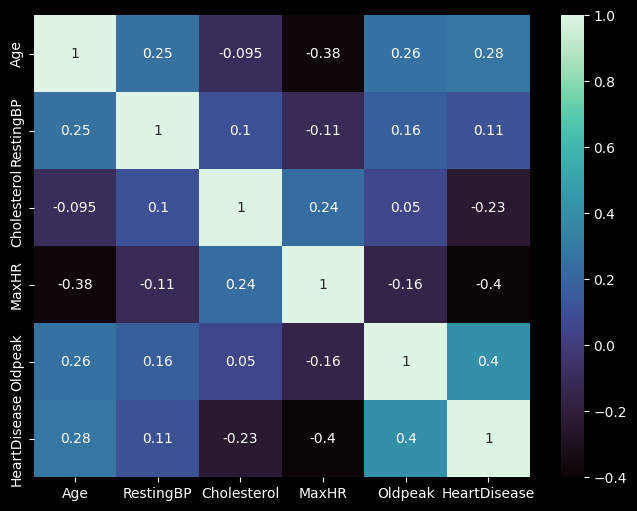

In [27]:
num_df = df1.select_dtypes('number')

plt.figure(figsize = (8,6))
sns.heatmap(num_df.corr(), cmap = 'mako', annot = True); ##crest

> The strongest correlations are between:
> - `HeartDisease` and `Oldpeak` (Positive correlation `0.40`)
> - `HeartDisease` and `MaxHR` (Negative correlation `0.40`)
> - `MaxHR` and `Age` (Negative correlation `0.38`)
>
> The feature with the weakest correlation with `Heart Disease` is:
> - `RestingBP` (Positive correlation `0.11`)

**Categorical features vs target visualisation**

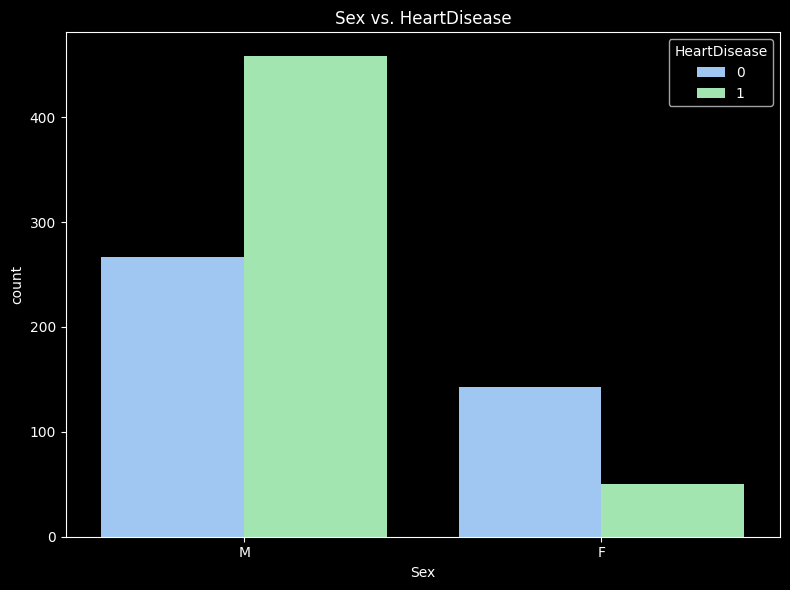

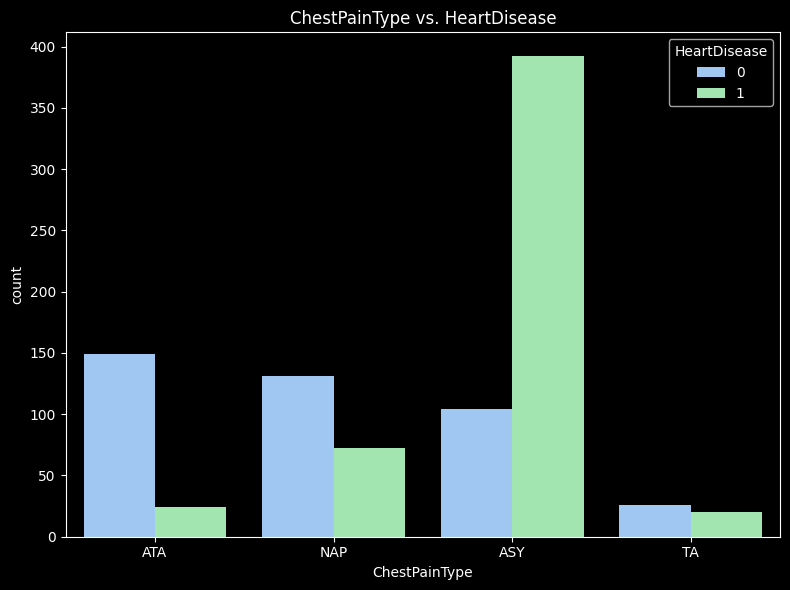

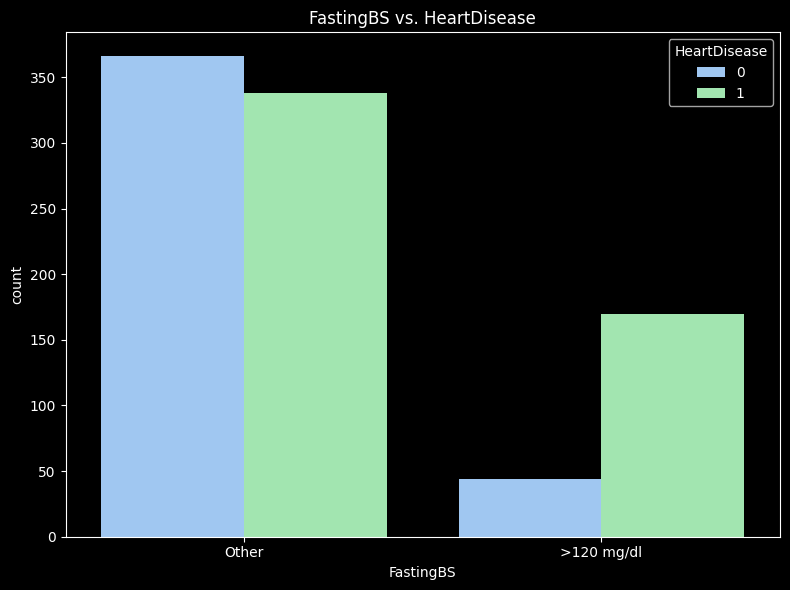

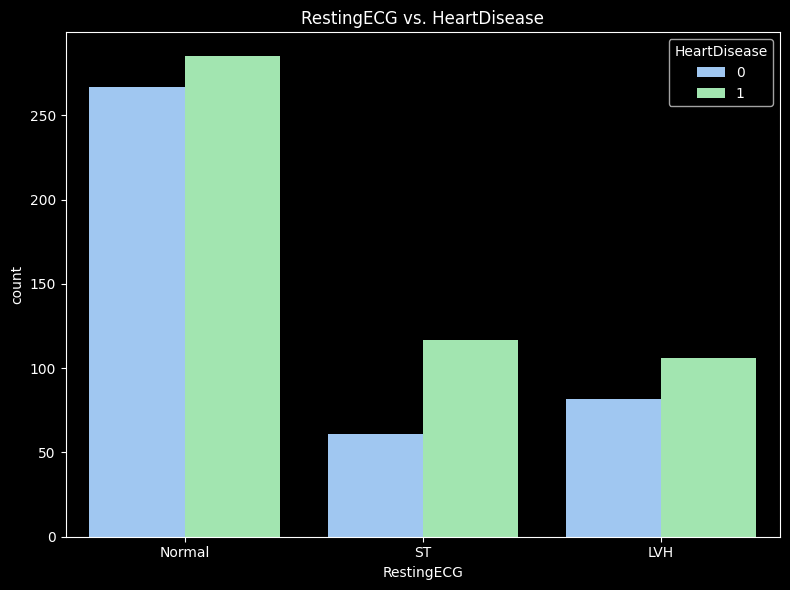

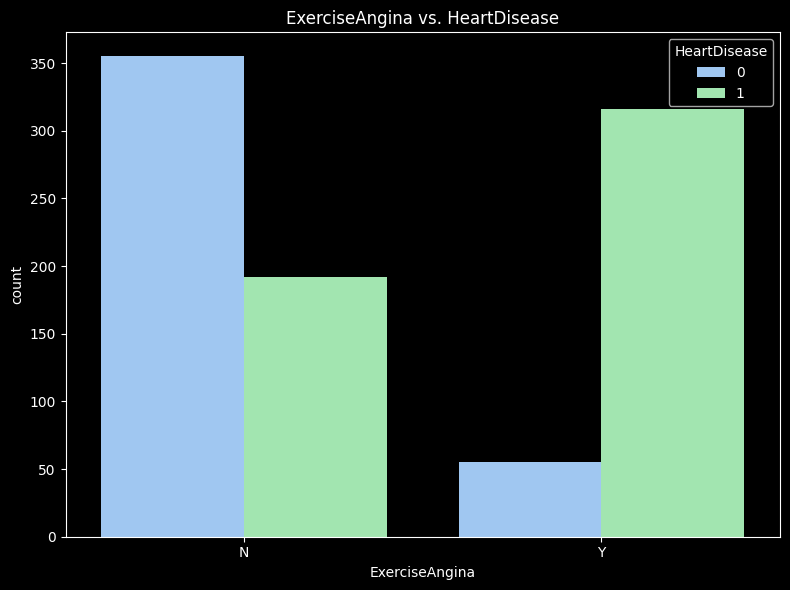

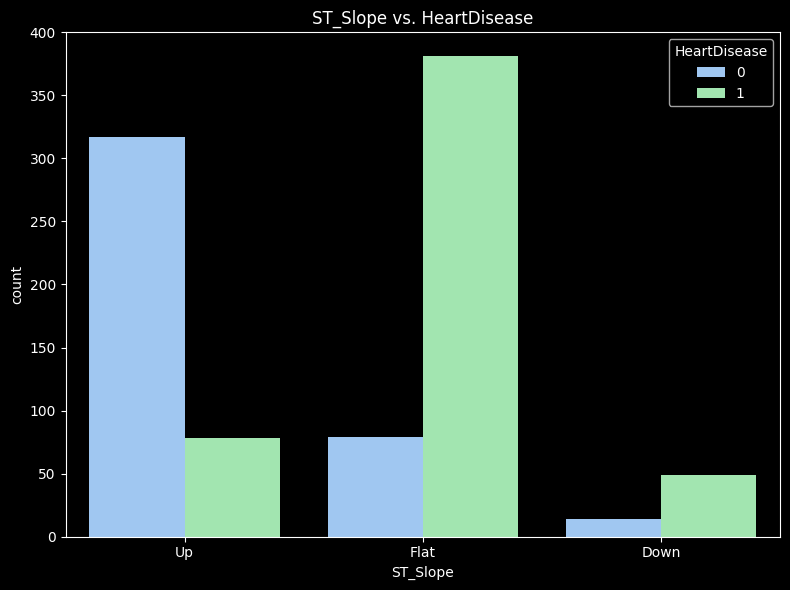

In [28]:
for i in cat_feature:
  plot_categorical_vs_target(df1, i, target);

> - `Males` have more cases of heart disease than females.
> - There are more males with heart disease than normal male patients while there are more normal female patients than female patients presenting with heart disease.

> - Patients with `Asymptomatic` chest pain have significantly more cases of heart disease than other types of chest pain.
> - There are more heart disease patients with Asymptomatic chest pain than normal patients with Asymptomatic chest pain.

> - There are more normal patients with a `fasting blood sugar` less than or equal to 120 mg/dl than heart disease patients with a fasting blood sugar less than or equal to 120 mg/dl.
> - Patients with a fasting blood sugar > 120mg/dl present more with heart disease than normal patients with a fasting blood sugar > 120 mg/dl.

> - Patients with a normal `resting ECG` have significantly more cases of heart disease than other results of a resting ECG.
> - There are more heart disease patients with a normal resting ECG than normal patients with a normal resting ECG result.

> - There are significantly more heart disease patients with `exercise-induced angina` than normal patients with excercise-induced angina.
> - And there are more heart disease patients with excercise-induced angina than heart-disease patients without excercise-induced angina.

> - There are significantly more heart disease patients with a flat `ST slope` than normal patients with a flat ST slope.
> - There are more normal patients with an upwardS ST slope than heart disease patients with an upward ST slope.

**Numerical features vs target visualisation**

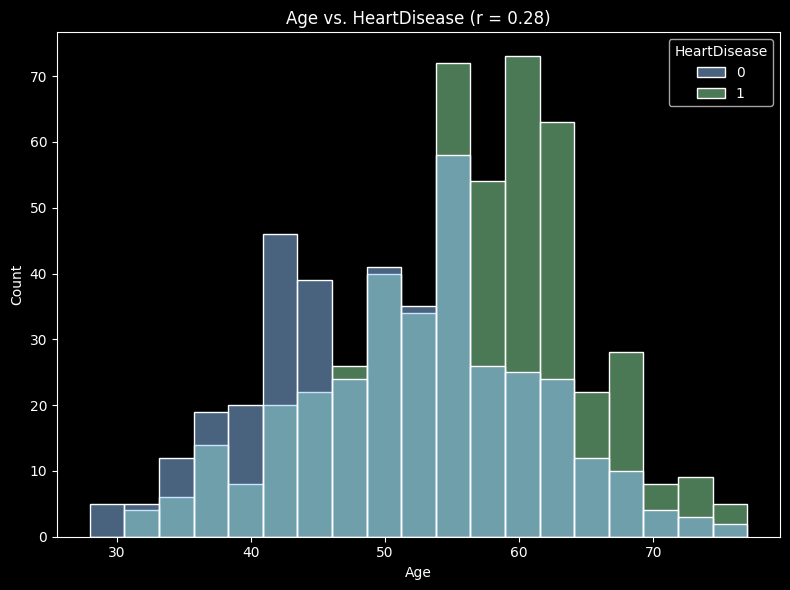

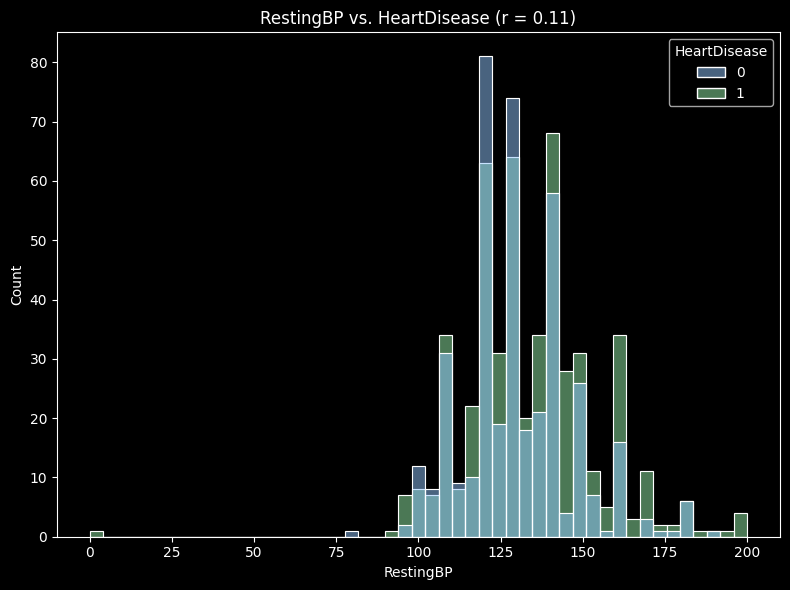

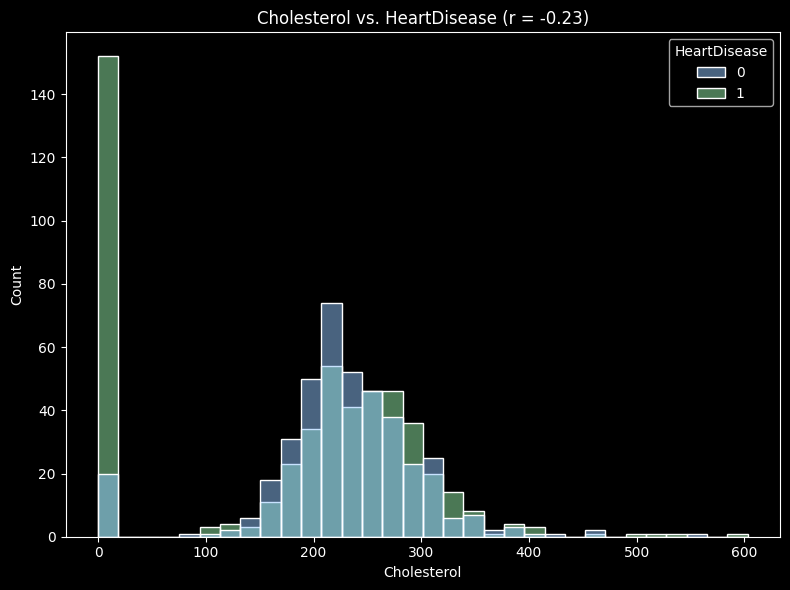

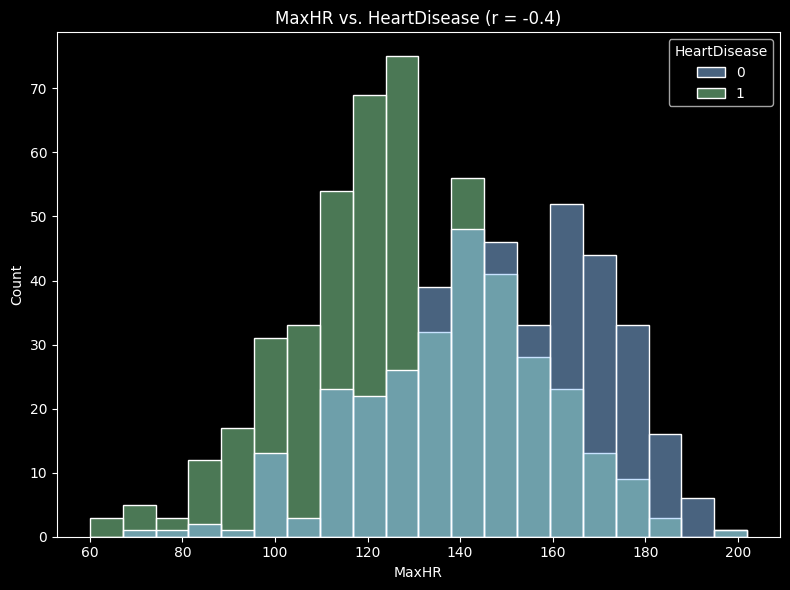

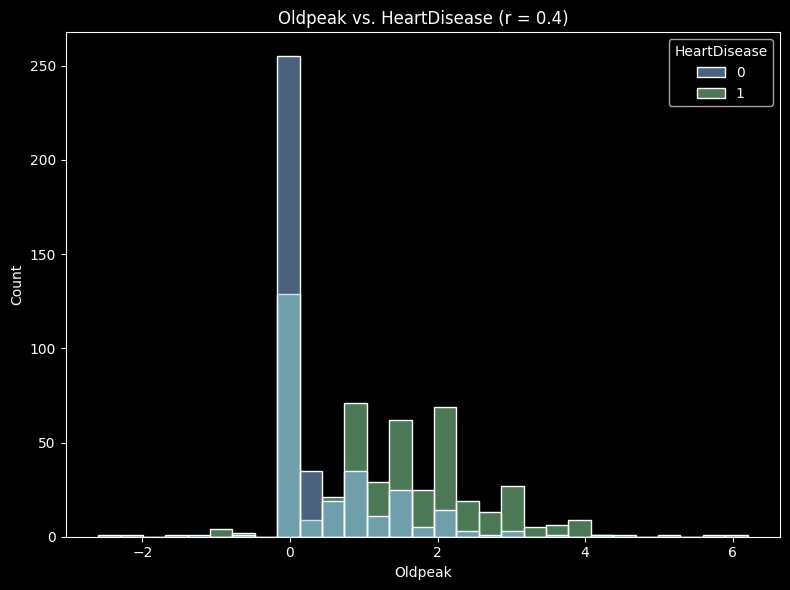

In [29]:
for j in num_feature:
  plot_numeric_vs_target(df1, j, target);

> - Patients with heart disease seem to be `older` than normal patients.

> - Patients with heart disease have similar `resting blood pressure` values than normal patients, however higher resting blood pressure values may be attributed to heart disease patients.

> - Patients with heart disease have similar `cholesterol` values than normal patients, however higher cholesterol values may be attributed to heart disease patients. Cholesterol values of zero are attributed mainly to heart disease patients.

> - Patients with heart disease seem to have lower `maximum heart rate` values.

> - Patients with heart disease have higher `old peak` values than normal patients. Old peak values of zero are attributed mainly to normal patients.

## Visualisations for stakeholders

**1. Proportion and average age of heart disease patients by gender**


Get gender proportion

In [30]:
gender_hd = df1[df1['HeartDisease'] == 1]['Sex'].value_counts()
gender_hd_pie = [gender_hd[0] / sum(gender_hd) * 100, gender_hd[1] / sum(gender_hd) * 100]

In [31]:
gender_nor = df1[df1['HeartDisease'] == 0]['Sex'].value_counts()
gender_nor_pie = [gender_nor[0] / sum(gender_nor) * 100, gender_nor[1] / sum(gender_nor) * 100]

Visual

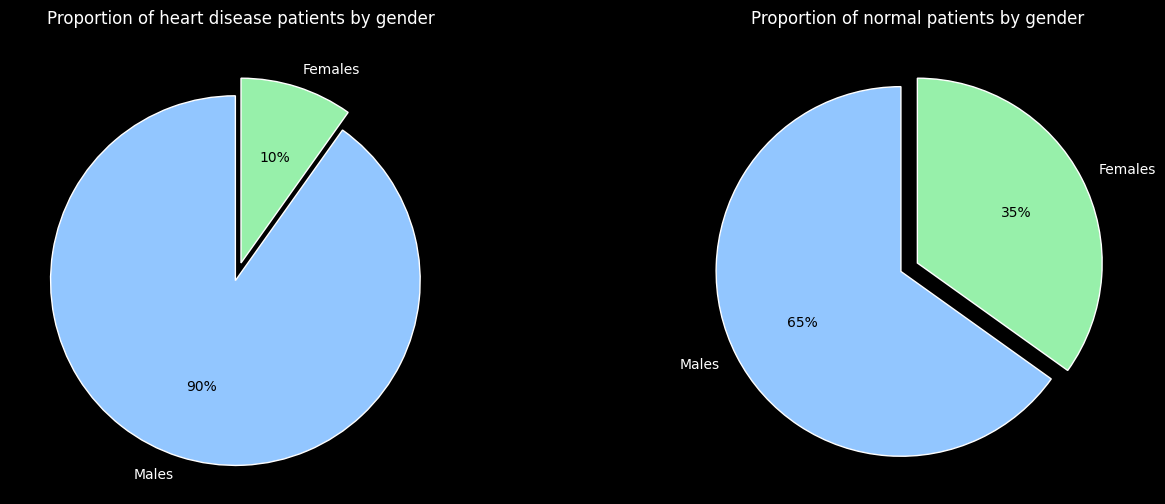

In [32]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))

plt.subplot(1, 2, 1)
_,_,autotexts = plt.pie(gender_hd_pie, labels = ['Males', 'Females'],
                        autopct='%1.0f%%',
                        startangle = 90, explode = (0.1, 0),# textprops={'color': 'black'},
                        wedgeprops = {'edgecolor' : 'white', 'linewidth': 1, 'antialiased' : True})

for ins in autotexts:
    ins.set_color('black')

plt.title('Proportion of heart disease patients by gender');

plt.subplot(1, 2, 2)
_,_,autotexts = plt.pie(gender_nor_pie, labels = ['Males', 'Females'],
                        autopct='%1.0f%%',
                        startangle = 90, explode = (0.1, 0),# textprops={'color': 'black'},
                        wedgeprops = {'edgecolor' : 'white', 'linewidth': 1, 'antialiased' : True})

for ins in autotexts:
    ins.set_color('black')

plt.title('Proportion of normal patients by gender');

plt.show()

> - 90% of patients presenting with heart disease are male, while 10% are female.
> - 65% of normal patients are male, while 35% are female.

**2. Mean age by outcome**

Get mean age

In [33]:
age_total_hd = df1[df1['HeartDisease'] == 1]['Age'].sum()
age_count_hd = df1[df1['HeartDisease'] == 1]['Age'].count()
age_hd = age_total_hd/age_count_hd

age_total_nor = df1[df1['HeartDisease'] == 0]['Age'].sum()
age_count_nor = df1[df1['HeartDisease'] == 0]['Age'].count()
age_nor = age_total_nor/age_count_nor

age_graph = [age_nor, age_hd]
outcome_graph = ['Normal', 'Heart disease']

Visual

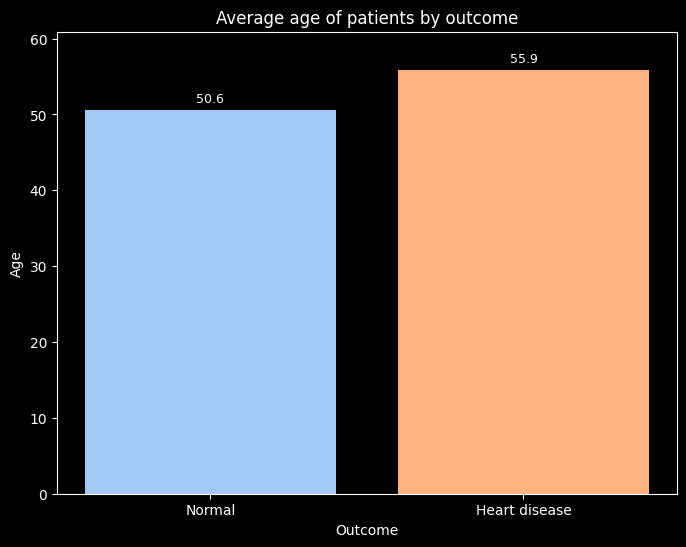

In [34]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,6))

palette = sns.color_palette('pastel')

plt.bar(outcome_graph, age_graph, color = [palette[0], palette[1]])

for i, age in enumerate(age_graph):
    plt.text(i, age + 1, f'{age:.1f}', horizontalalignment='center', fontsize = 9, color='white')

plt.xlabel('Outcome', fontdict={'fontsize':10})
plt.ylabel('Age', fontdict={'fontsize':10})
plt.title('Average age of patients by outcome')
plt.ylim(0, max(age_graph) + 5);

plt.show()

> - Heart disease patients are older than normal patients by around 5 years.

**3. Proportion of heart disease patients by chest pain type**

Get chest pain type proportion

In [35]:
chestpain_nor = df1[df1['HeartDisease'] == 0]['ChestPainType'].value_counts()
chestpain_nor_pie = [chestpain_nor[0] / sum(chestpain_nor) * 100, chestpain_nor[1] / sum(chestpain_nor) * 100, chestpain_nor[2] / sum(chestpain_nor) * 100, chestpain_nor[3] / sum(chestpain_nor) * 100]

In [36]:
chestpain_hd = df1[df1['HeartDisease'] == 1]['ChestPainType'].value_counts()
chestpain_hd_pie = [chestpain_hd[0] / sum(chestpain_hd) * 100, chestpain_hd[1] / sum(chestpain_hd) * 100, chestpain_hd[2] / sum(chestpain_hd) * 100, chestpain_hd[3] / sum(chestpain_hd) * 100]

Visual

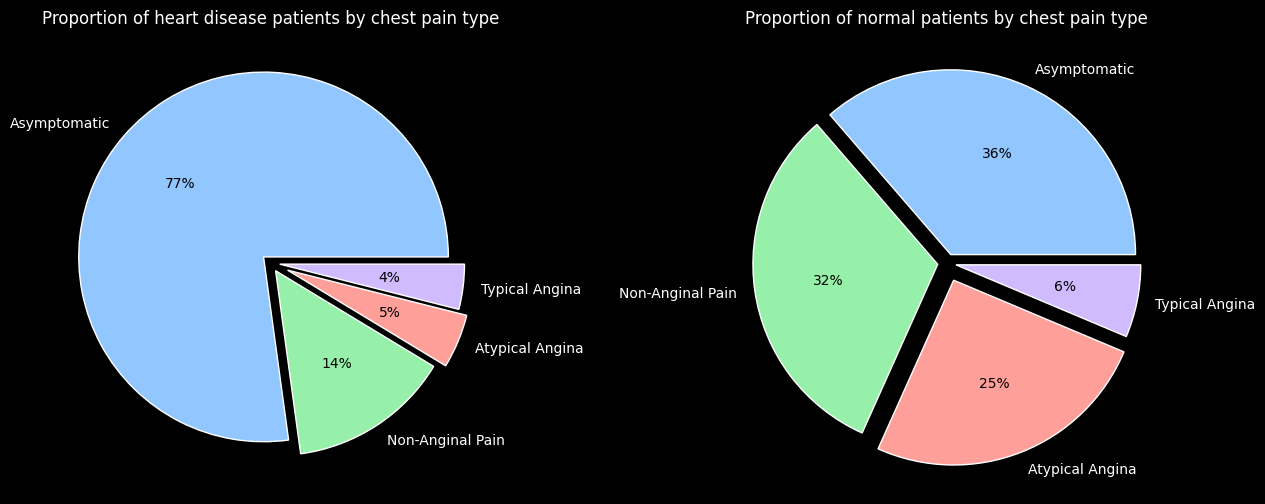

In [37]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))

plt.subplot(1, 2, 1)
_,_,autotexts = plt.pie(chestpain_hd_pie, labels = ["Asymptomatic", "Non-Anginal Pain", "Atypical Angina", "Typical Angina"],
                        autopct='%1.0f%%',
                        startangle = 0, explode = (0.05, 0.05, 0.1, 0.05),# textprops={'color': 'black'},
                        wedgeprops = {'edgecolor' : 'white', 'linewidth': 1, 'antialiased' : True})

for ins in autotexts:
    ins.set_color('black')

plt.title('Proportion of heart disease patients by chest pain type');

plt.subplot(1, 2, 2)
_,_,autotexts = plt.pie(chestpain_nor_pie, labels = ["Asymptomatic", "Non-Anginal Pain", "Atypical Angina", "Typical Angina"],
                        autopct='%1.0f%%',
                        startangle = 0, explode = (0.05, 0.05, 0.1, 0.05),# textprops={'color': 'black'},
                        wedgeprops = {'edgecolor' : 'white', 'linewidth': 1, 'antialiased' : True})

for ins in autotexts:
    ins.set_color('black')

plt.title('Proportion of normal patients by chest pain type');

plt.show()

> - Most patients presenting with heart disease have Asymptomatic chest pain (77%).
> - Second most patients presenting with heart disease have Non-Anginal chest pain (14%).
> - Other heart disease patients present with Atypical Angina chest pain (5%) and Typical Angina chest pain (4%).
>
> - Most normal patients presenting with heart disease have Asymptomatic chest pain (36%)and Non-Anginal chest pain (32%).
> - Other heart disease patients present with Atypical Angina chest pain (25%) and a small proportion with Typical Angina chest pain (6%).

# Part 4



## Requirements

**Modeling**
- Complete the appropriate pre-processing steps.
- Fit and evaluate multiple types of models on your data.
- Evaluate each model with multiple appropriate metrics on BOTH the train and test data.
- Use GridSearchCV to tune some of the hyperparameters of each model.
- Display the metrics of your best tuned version of each model type.
- Try feature engineering techniques or PCA to engineer your dataset to see how this impacts your modeling results.
- Try multiple techniques depending on your data!
- Choose your "production" model and justify this decision using the metrics most important to your business problem.

*Ensure that you have provided clear comments.*

**Readme**
- Create a README.md file in your GitHub repository.
- This README should include:
 - Your business problem and stakeholders
 - The source of your data
 - A description of your data
 - Two analytical insights from your data analysis (Refer to Project 2 - Part 3. Include visualizations AND written interpretations.)
 - The metrics for your best model
 - A description of how well your model would solve your business problem
 - A summary with at least two recommendations for your stakeholders, based on your model performance AND analytical findings

## Model validation split

Define the features and target:

In [38]:
X = df_ml.drop(columns = target).copy()
y = df_ml[target].copy()

Confirm the distribution of the target class:

In [39]:
y.value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

> - Data seems to be balanced

Train-test split:

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Check the distribution of train class:

In [41]:
y_train.value_counts(normalize=True)

1    0.546512
0    0.453488
Name: HeartDisease, dtype: float64

> - This is acceptable.

In [42]:
df_ml.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Other,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,Other,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,Other,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,Other,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,Other,Normal,122,N,0.0,Up,0


## Preprocessing for modelling

> I  opt to split the data into
>
>- numeric columns: `Age`, `RestingBP`, `Cholesterol`, `MaxHR`, `Oldpeak`
>- categorical columns: `Sex`, `ChestPainType`, `FastingBS`, `RestingECG`, `ExerciseAngina`, `ST_Slope`
>
>for processing.

>Categorical columns will be processed using `one-hot encoding` since it represents nominal data without ranking. As such binary columns representing each category will be created.

#### Numeric transformation

In [43]:
# Transformers
#mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

# Pipeline
num_pipeline = make_pipeline(scaler)

# Selector
num_selector = make_column_selector(dtype_include= 'number')

# Tuple
num_tuple = ('numeric', num_pipeline, num_selector)

#### Categorical transformation

In [44]:
# Transformers
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Pipeline
cat_pipeline = make_pipeline(ohe)

# Selector
cat_selector = make_column_selector(dtype_include= 'object')

# Tuple
cat_tuple = ('category', cat_pipeline, cat_selector)

Preprocessor

In [45]:
preprocessor = ColumnTransformer(transformers=[num_tuple,
                                               cat_tuple],
                                               remainder='drop')
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7a7c81bdcd00>),
                                ('category',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7a7c81bde380>)])

## Modelling

#### Fit and evaluate multiple models

List of models to fit and evaluate

In [46]:
models = [
    ('Random Forest', RandomForestClassifier(random_state = 42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state = 42)),
    ('SVM', SVC(random_state = 42))
]

Fit and evaluate each model

------------------------------------------------------------
Training data classification report: Random Forest
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       312
           1       1.00      1.00      1.00       376

    accuracy                           1.00       688
   macro avg       1.00      1.00      1.00       688
weighted avg       1.00      1.00      1.00       688



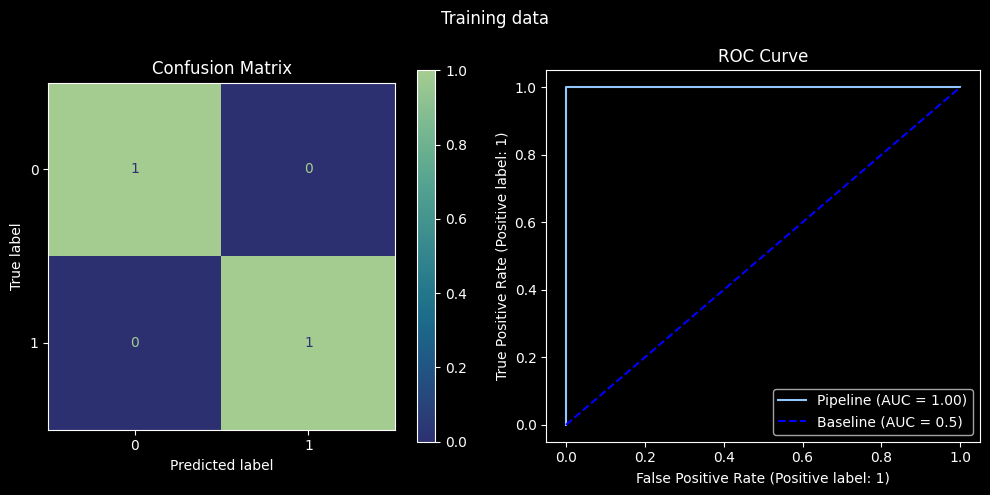

------------------------------------------------------------
Testing data classification report: Random Forest
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        98
           1       0.92      0.89      0.90       132

    accuracy                           0.89       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.89      0.89      0.89       230



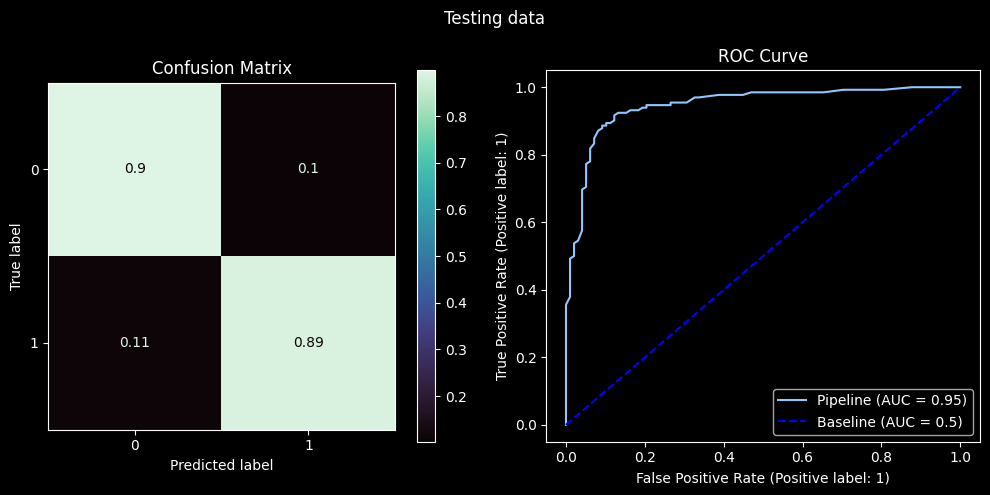

------------------------------------------------------------
Training data classification report: Gradient Boosting
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       312
           1       0.94      0.97      0.95       376

    accuracy                           0.95       688
   macro avg       0.95      0.95      0.95       688
weighted avg       0.95      0.95      0.95       688



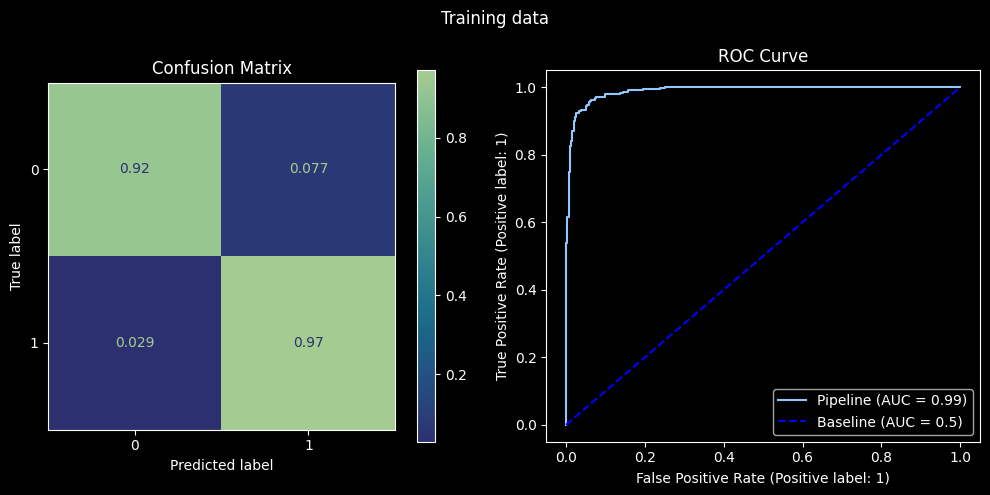

------------------------------------------------------------
Testing data classification report: Gradient Boosting
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        98
           1       0.92      0.84      0.88       132

    accuracy                           0.87       230
   macro avg       0.86      0.87      0.86       230
weighted avg       0.87      0.87      0.87       230



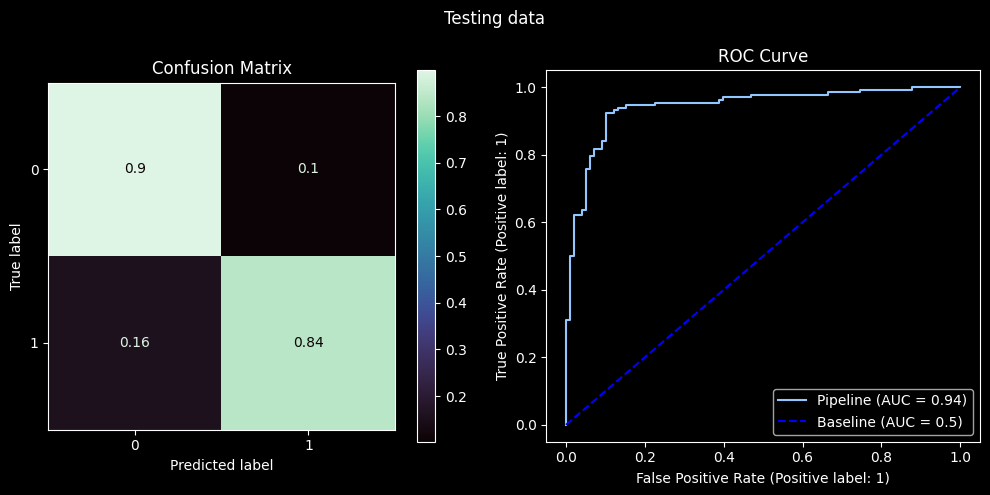

------------------------------------------------------------
Training data classification report: SVM
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       312
           1       0.89      0.94      0.91       376

    accuracy                           0.90       688
   macro avg       0.91      0.90      0.90       688
weighted avg       0.90      0.90      0.90       688



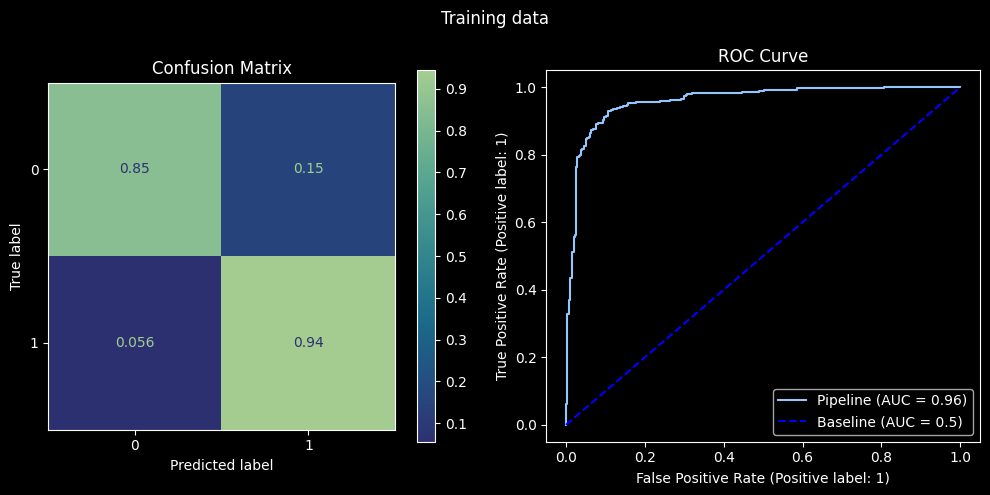

------------------------------------------------------------
Testing data classification report: SVM
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.84      0.85        98
           1       0.88      0.89      0.89       132

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



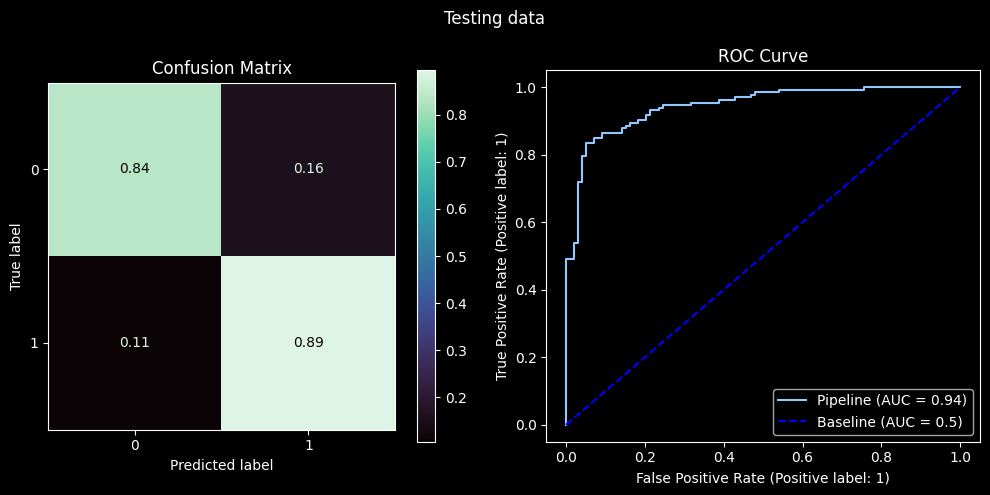

In [47]:
for model_name, model in models:

  model_pipe = make_pipeline(preprocessor, model)
  model_pipe.fit(X_train, y_train)
  evaluate_model(model_name, model_pipe, X_train, y_train, X_test, y_test)

**Random Forest Classifier Model**
> - The model achieved perfect scores on the training data.
> - There is a slight drop in scores on the test data.
> - Overall, the model performs well but performance on the test data may be improved by tuning.

**Gradient Boosting Classifier Model**
> - The model has high scores on the training data.
> - There is a slight drop in scores on the test data, which is common.
> - Overall, the model indicates a good generalization ability.

**Support Vector Machine Model**
> - The model has high scores on the training data.
> - There is a drop in scores on the test data, which is common.
> - Overall, the model performs well.

#### Tune the Hyperparameters

Specify parameters per model

In [48]:
params = {
    'Random Forest': {
        'randomforestclassifier__n_estimators': [100, 200, 300],
        'randomforestclassifier__max_depth': [None, 10, 20, 30]
        },
    'Gradient Boosting': {
        'gradientboostingclassifier__n_estimators': [100, 200, 300],
        'gradientboostingclassifier__learning_rate': [0.01, 0.1, 0.2]
        },
    'SVM': {
        'svc__C': [0.1, 1, 10],
        'svc__kernel': ['linear', 'rbf']
        }
}

Use GridSearch CV to find the best hyperparameters

------------------------------------------------------------
Training data classification report: Random Forest
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       312
           1       1.00      1.00      1.00       376

    accuracy                           1.00       688
   macro avg       1.00      1.00      1.00       688
weighted avg       1.00      1.00      1.00       688



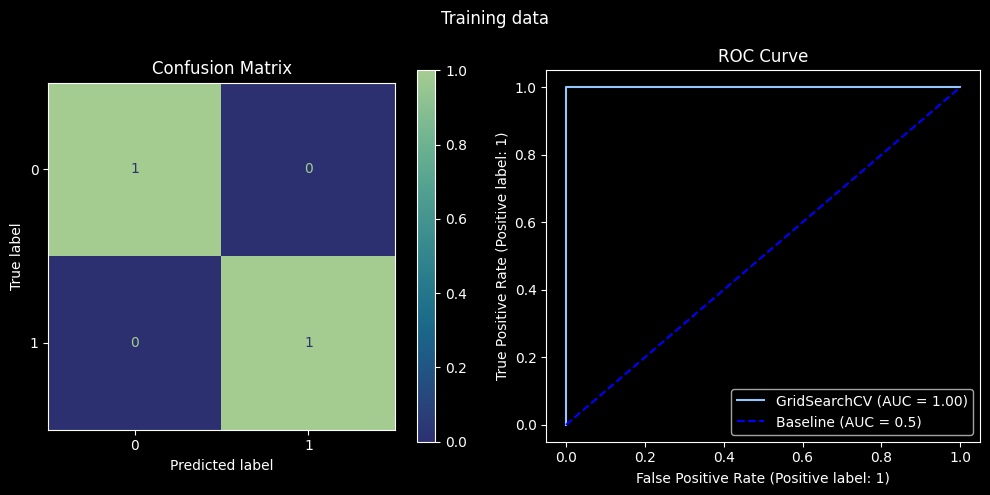

------------------------------------------------------------
Testing data classification report: Random Forest
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        98
           1       0.92      0.89      0.90       132

    accuracy                           0.89       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.89      0.89      0.89       230



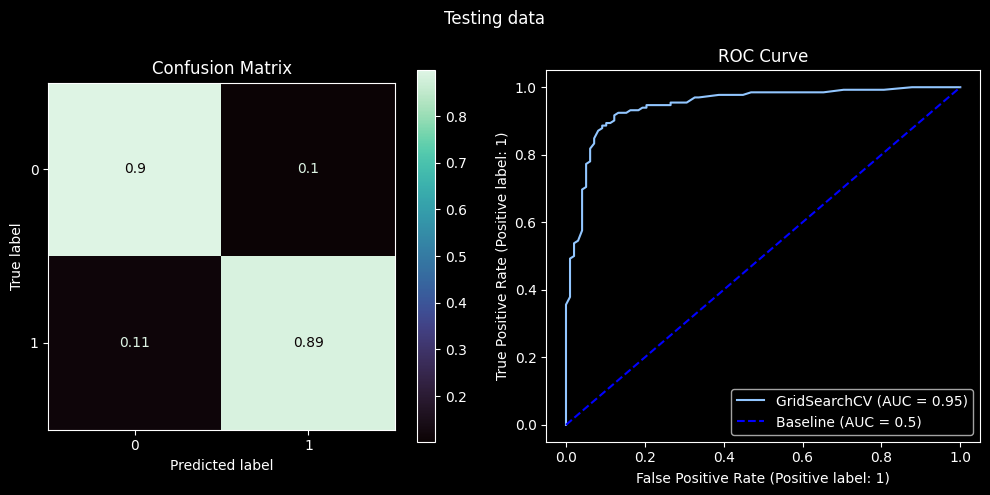

------------------------------------------------------------
Training data classification report: Gradient Boosting
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       312
           1       0.89      0.94      0.91       376

    accuracy                           0.90       688
   macro avg       0.91      0.90      0.90       688
weighted avg       0.90      0.90      0.90       688



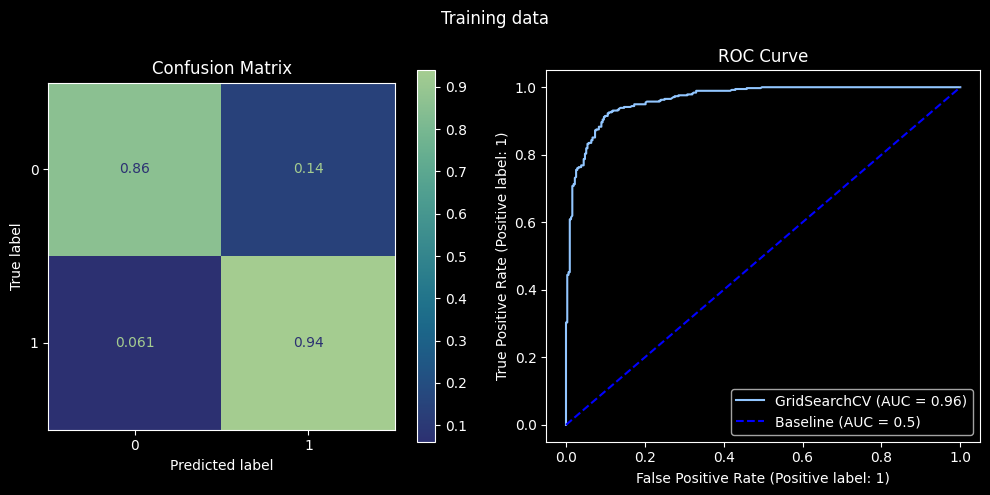

------------------------------------------------------------
Testing data classification report: Gradient Boosting
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        98
           1       0.91      0.89      0.90       132

    accuracy                           0.89       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.89      0.89      0.89       230



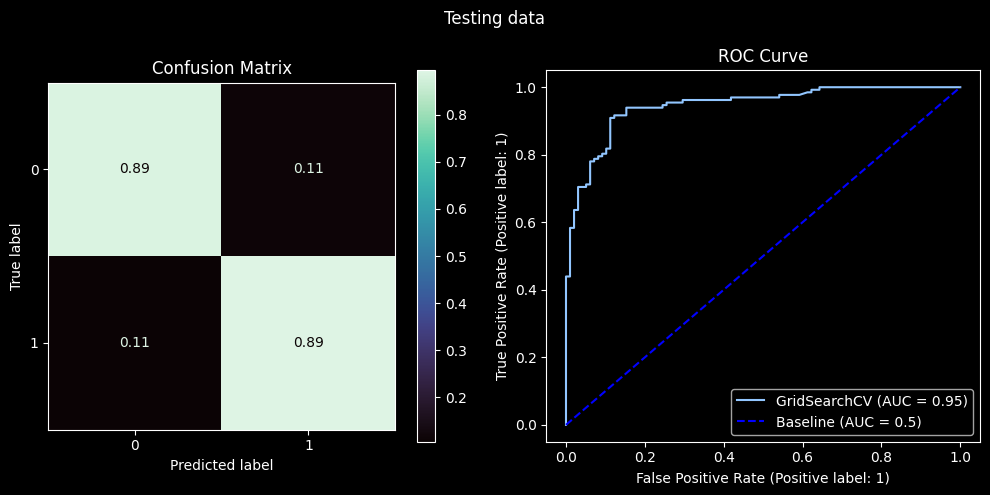

------------------------------------------------------------
Training data classification report: SVM
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       312
           1       0.89      0.94      0.91       376

    accuracy                           0.90       688
   macro avg       0.91      0.90      0.90       688
weighted avg       0.90      0.90      0.90       688



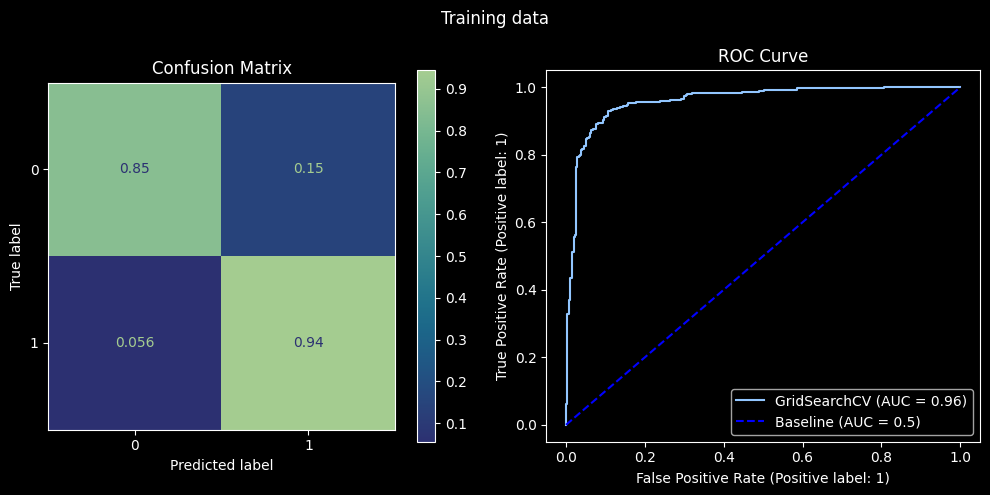

------------------------------------------------------------
Testing data classification report: SVM
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.84      0.85        98
           1       0.88      0.89      0.89       132

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



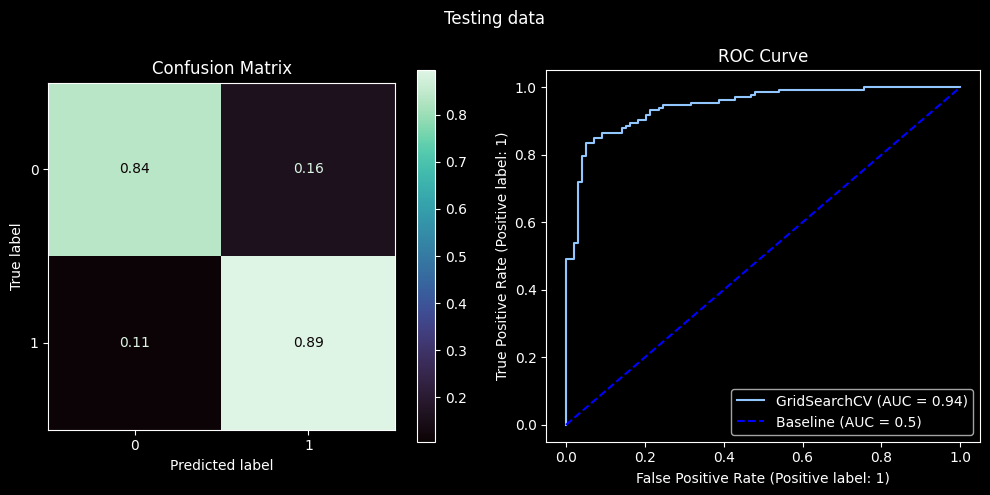

In [49]:
for model_name, model in models:
    model_params = params[model_name]

    model_pipe = make_pipeline(preprocessor, model)
    gs_model = GridSearchCV(model_pipe, model_params, cv= 5)
    gs_model.fit(X_train, y_train)
    evaluate_model(model_name, gs_model, X_train, y_train, X_test, y_test)

**Random Forest Classifier Model**
> - Tuning had no impact on the models performance, as the test scores remained the same.
> - Different tuning strategies may be considered to improve the models performance.

**Gradient Boosting Classifier Model**
> - Tuning has improved the precision for both the Heart failure and Normal target classes in the test data.
> - This suggests that the model is making fewer false positive predictions for both classes.
> - However, we are interested in reducing recall, i.e. we aim to ensure that our model identifies as many positive cases as possible (even if it may result in more false positives).
> - This is because there are severe consequences for a false negative, i.e. not being able to predict heart failure could be fatal.

**Support Vector Machine Model**
> - Tuning had no impact on the models performance, as the test scores remained the same.
> - Different tuning strategies may be considered to improve the models performance.

## Modelling with feature engineering and PCA

In [50]:
df_ml2 = df_ml.copy()

#### Feature engineering

Feature engineering is the process of selecting, creating, or transforming data attributes to enhance the performance of machine learning models.

Bin `Age` into age bands

In [51]:
age_bands = [0, 10, 20, 30, 40, 50, 60, float('inf')]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60 and over']

df_ml2['AgeBand'] = pd.cut(df_ml2['Age'], bins=age_bands, labels=age_labels, right=False)

View `Age`

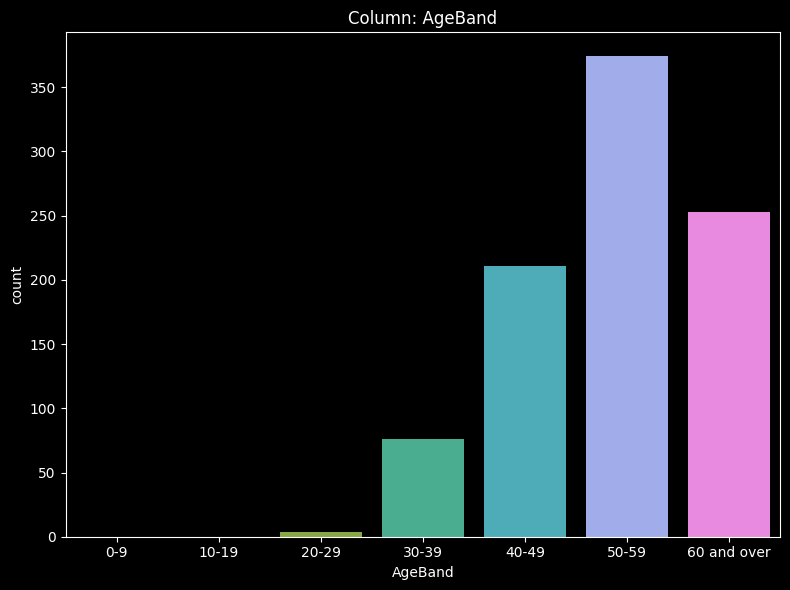

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: '50-59' occurs 374 times (40.74%)
- Not constant or quasi-constant.


In [52]:
explore_categorical(df_ml2, 'AgeBand');

Drop the `Age` column

In [53]:
df_ml2 = df_ml2.drop('Age', axis = 1)

#### Model validation split

Define the features and target:

In [54]:
X_pca = df_ml2.drop(columns = target).copy()
y_pca = df_ml2[target].copy()

Train-test split:

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_pca, random_state=42)

#### Preprocessing for modelling

> I  opt to split the data into
>
>- numeric columns: `RestingBP`, `Cholesterol`, `MaxHR`, `Oldpeak`
>- categorical columns: `AgeBand`, `Sex`, `ChestPainType`, `FastingBS`, `RestingECG`, `ExerciseAngina`, `ST_Slope`
>
>for processing.

>Categorical columns will be processed using `one-hot encoding` since it represents nominal data without ranking. As such binary columns representing each category will be created.

#### PCA

Principal Component Analysis is a dimensionality reduction technique that transforms data while preserving as much variance as possible.


**Numeric transformation with feature engineering and PCA**

In [56]:
# Additional transformers
pca = PCA(n_components = 0.75)

# New pipeline
num_pca_pipeline = make_pipeline(scaler, pca)

# New selector
num_excl_age = make_column_selector(dtype_include= 'number')

# New tuple
num_pca_tuple = ('numeric', num_pca_pipeline, num_excl_age)

**Categorical transformation with feature engineering and PCA**

In [57]:
df_ml2['AgeBand'] = df_ml2['AgeBand'].astype('object')

# New selector
cat_incl_age = make_column_selector(dtype_include= 'object')

# New tuple
cat_tuple = ('category', cat_pipeline, cat_incl_age)

Preprocessor with PCA

In [58]:
pca_preprocessor = ColumnTransformer(transformers=[num_pca_tuple,
                                                   cat_tuple],
                                     remainder='drop')
pca_preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('pca',
                                                  PCA(n_components=0.75))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7a7c83630ee0>),
                                ('category',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7a7c83f1d0f0>)])

Effect of PCA

In [59]:
print('Shape before PCA:', X_train.select_dtypes('number').shape)
print('Shape after PCA:', pca_preprocessor.fit_transform(X_train.select_dtypes('number')).shape)
print('Column count reduced by: ', X_train.select_dtypes('number').shape[1] - pca_preprocessor.fit_transform(X_train.select_dtypes('number')).shape[1])

Shape before PCA: (688, 4)
Shape after PCA: (688, 3)
Column count reduced by:  1


PCA reduces the 4 numeric columns to 3 and retains 75% of the information (variance) of the original features.

#### Fit and evaluate multiple models

List of models to fit and evaluate

In [60]:
models = [
    ('Random Forest', RandomForestClassifier(random_state = 42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state = 42)),
    ('SVM', SVC(random_state = 42))
]

Fit and evaluate each model

------------------------------------------------------------
Training data classification report: Random Forest
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       312
           1       1.00      1.00      1.00       376

    accuracy                           1.00       688
   macro avg       1.00      1.00      1.00       688
weighted avg       1.00      1.00      1.00       688



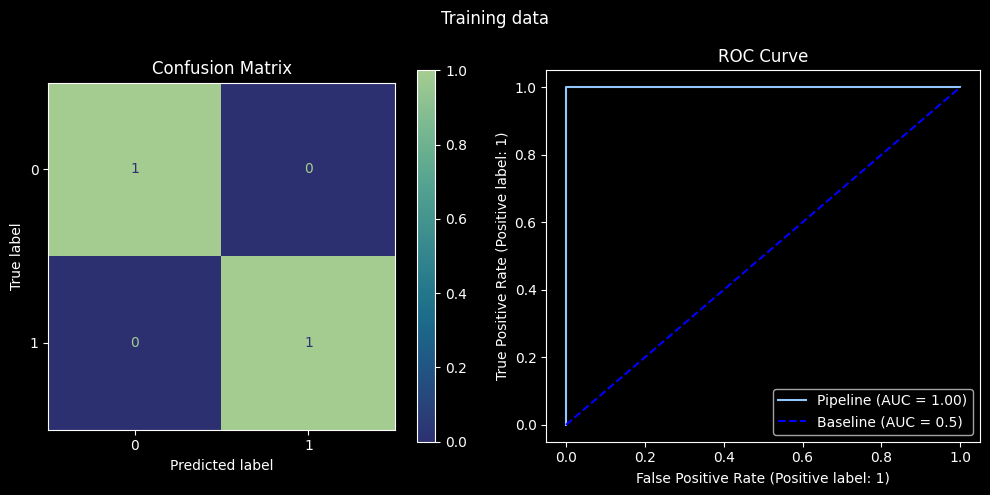

------------------------------------------------------------
Testing data classification report: Random Forest
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        98
           1       0.90      0.89      0.89       132

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230



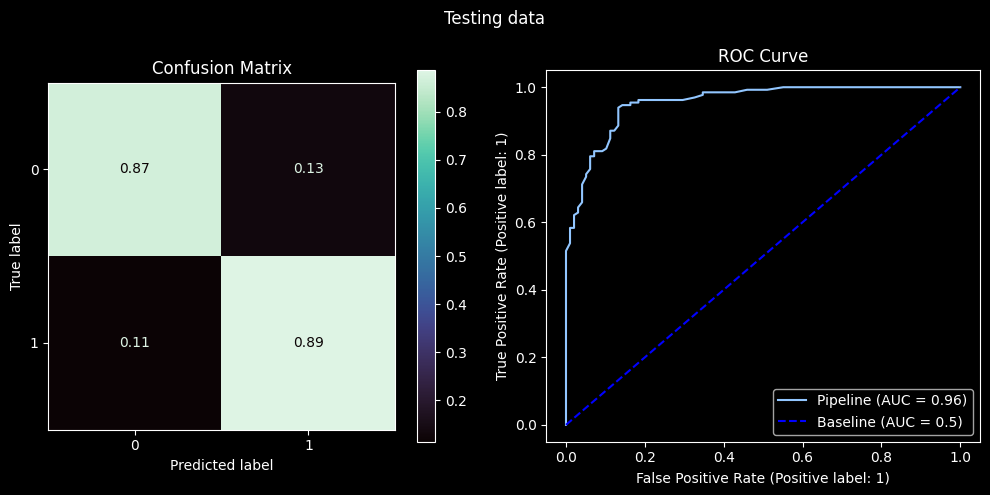

------------------------------------------------------------
Training data classification report: Gradient Boosting
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       312
           1       0.94      0.97      0.96       376

    accuracy                           0.95       688
   macro avg       0.95      0.95      0.95       688
weighted avg       0.95      0.95      0.95       688



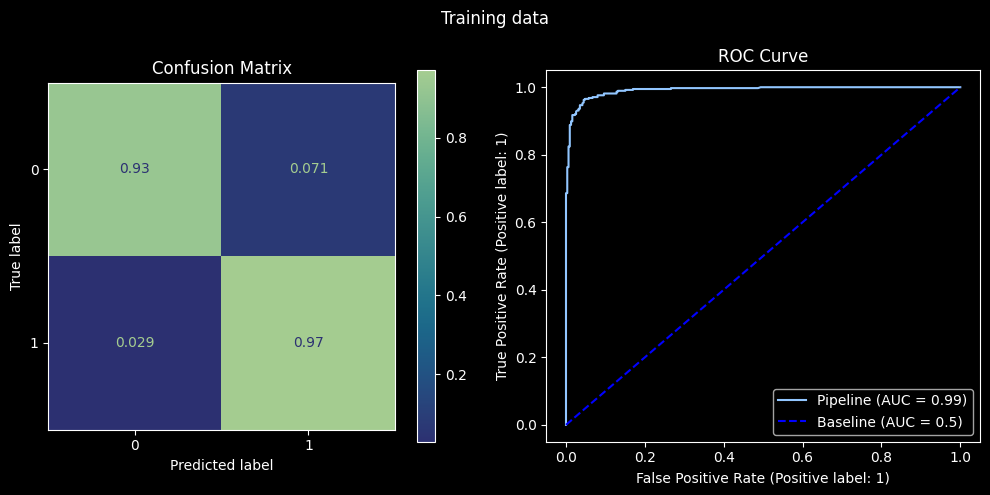

------------------------------------------------------------
Testing data classification report: Gradient Boosting
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        98
           1       0.92      0.84      0.88       132

    accuracy                           0.87       230
   macro avg       0.86      0.87      0.86       230
weighted avg       0.87      0.87      0.87       230



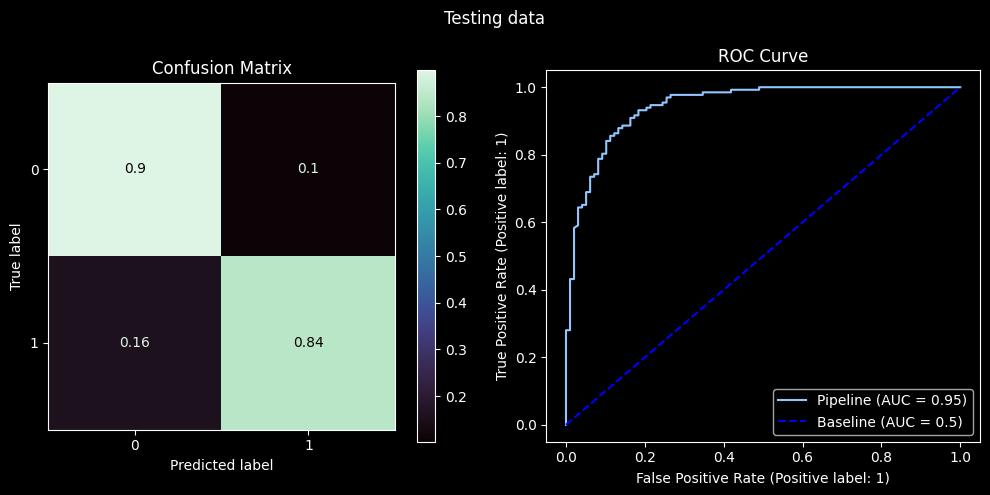

------------------------------------------------------------
Training data classification report: SVM
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       312
           1       0.89      0.94      0.91       376

    accuracy                           0.90       688
   macro avg       0.91      0.90      0.90       688
weighted avg       0.90      0.90      0.90       688



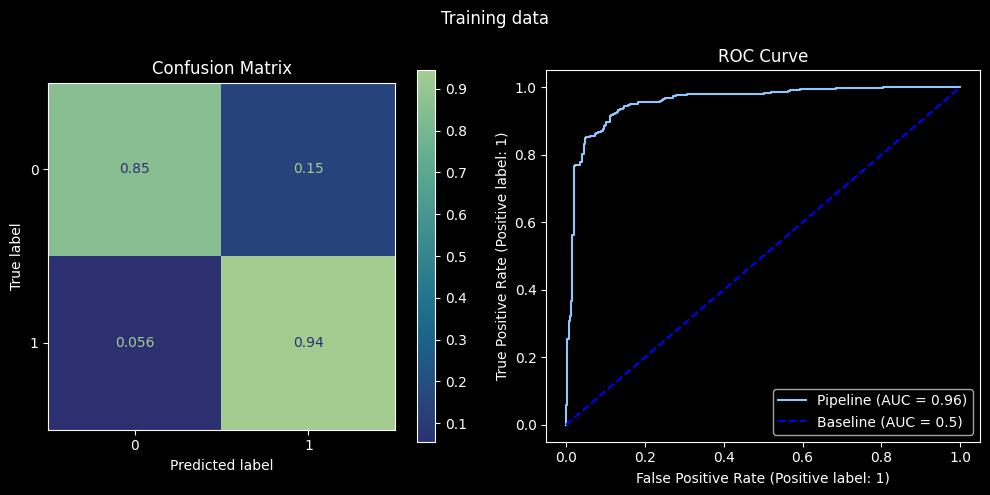

------------------------------------------------------------
Testing data classification report: SVM
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        98
           1       0.89      0.89      0.89       132

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230



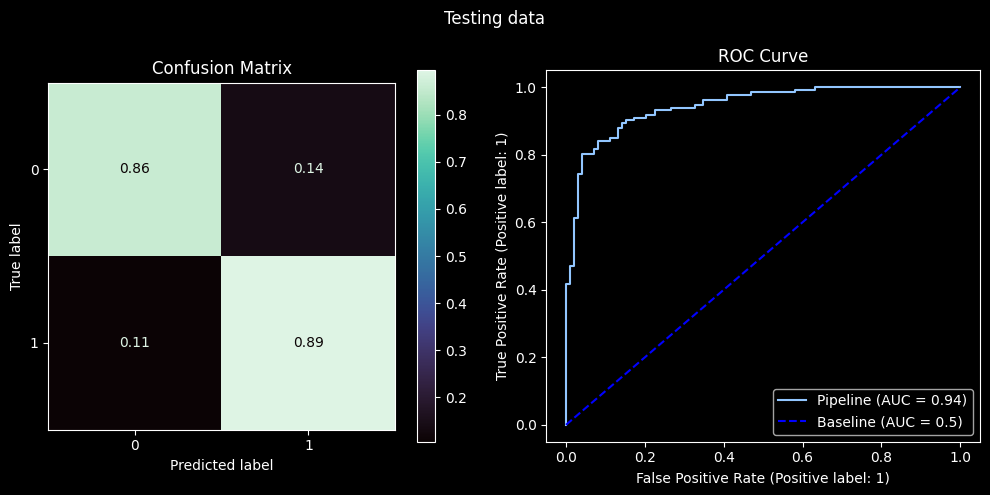

In [61]:
for model_name, model in models:

  model_pipe = make_pipeline(pca_preprocessor, model)
  model_pipe.fit(X_train, y_train)
  evaluate_model(model_name, model_pipe, X_train, y_train, X_test, y_test)

**Random Forest Classifier Model**
> - After PCA and feature engineering, the precision and recall scores have slightly decreased.
> - This could be due to the trade-off between dimensionality reduction and preserving important information in the data.
> - However, the model still performs well in distinguishing between Heart failure and Normal cases, with similar recall scores.

**Gradient Boosting Classifier Model**
> - After PCA and feature engineering, the precision for predicting Heart failure has decreased, indicating a higher rate of false positives.
> - The recall for predicting Heart failure has also decreased, indicating a higher rate of false negatives.
> - Again, this trade-off may be as a result of the dimensionality reduction caused by PCA and the changes in feature engineering.

**Support Vector Machine Model**
> - PCA and feature engineering had no impact on the models performance, as the test scores remained the same.

## Final choice

> The model that I choose is `Random Forest Classifier` before feature engineering and PAC because:
> - The model has the highest predictive accuracy `0.89`, indicating that the model performs well in classifying both Heart failure and Normal cases.
> - The model demonstrates high precision for predicting Heart failure `0.92`, i.e. when the model predicts Heart failure, it is correct 92% of the time.
> - The model has good recall for Heart failure `0.89`, i.e. it correctly identifies 89% of actual Heart failure cases.
> - For predicting Normal cases, the model has slightly lower precision `0.85` but good recall `0.90`.
> - Lastly, the model has a high AUC score of `0.95`.